# Importando Libraries e Dataset

In [60]:
# Importando Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lendo Dataset
bestsellers = pd.read_csv("../data/bestsellers with categories.csv")
bestsellers.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


- **Name:** O título do livro.
- **Author:** O nome do autor ou autora do livro.
- **User Rating:** A média das avaliações dos usuários, geralmente em uma escala de 1 a 5, representando a satisfação geral dos leitores com o livro.
- **Reviews:** O número total de resenhas que o livro recebeu de usuários.
- **Price:** O preço do livro.
- **Year:** O ano de lançamento ou publicação do livro.
- **Genre:** O gênero literário ao qual o livro pertence. "Non Fiction" indica que o livro é de não-ficção, ou "Fiction" indica que é um romance ou obra de ficção.

# Descrição e estrutura dos dados

#### A. Estrutura de colunas do Dataframe

In [42]:
bestsellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


#### B. Descrição estatística do Dataframe em colunas

In [43]:
bestsellers.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


#### C. Procurando por valores NaNs(Ausentes)

In [44]:
bestsellers.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

# Pergunta #1: Quais são os autores mais recorrentes?

#### A. Conta Quantas Vezes Cada Autor Aparece.

In [45]:
atoresRecorrentes = bestsellers["Author"].value_counts()
print(atoresRecorrentes)

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: count, Length: 248, dtype: int64


#### B. Pega o Maior, Menor e os mais Recorrentes Valores da Quantidade de Autores que Aparecem.

In [46]:
#Autor mais recorrente
maisRecorrente = atoresRecorrentes.idxmax()
maisRecorrenteValue = atoresRecorrentes.max()

#Autor menos recorrente
menosRecorrente = atoresRecorrentes.idxmin()
menosRecorrenteValue = atoresRecorrentes.min()

#Autores mais recorrentes
autoresMaisRecorrentes = atoresRecorrentes.head(5)
print(autoresMaisRecorrentes)

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Name: count, dtype: int64


#### C. Planejando Autores Mais Recorrentes.

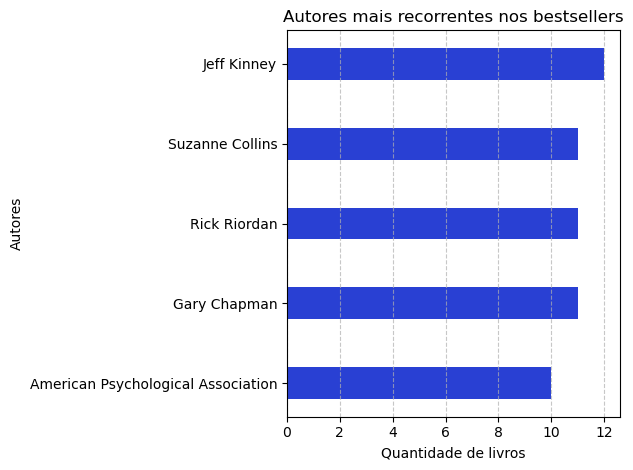

In [47]:
#Grafico autores mais recorrentes
autoresMaisRecorrentes = autoresMaisRecorrentes.sort_values(ascending=True)

plt.barh(autoresMaisRecorrentes.index, autoresMaisRecorrentes.values, height=0.4, color = '#2940d3')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.title("Autores mais recorrentes nos bestsellers")
plt.ylabel("Autores")
plt.xlabel("Quantidade de livros")
plt.tight_layout()

plt.savefig("../images/01-autores-recorrentes.png")
plt.show()

#### Resultado:
- O autor mais recorrente é Jeff Kinney, com 12 livros.
- Os demais autores listados possuem 10 ou 11 livros cada.

# Pergunta #2: O número de reviews influencia na nota("User Rating")?

#### A. Verificando a Correlação Entre as Colunas.

In [48]:
corrReviewNota = bestsellers["Reviews"].corr(bestsellers["User Rating"])
print("Correlação entre número de reviews e nota do usuário:", corrReviewNota)

Correlação entre número de reviews e nota do usuário: -0.0017290142555500398


#### B. Planejando Correlação entre Reviews e Nota("User Rating").

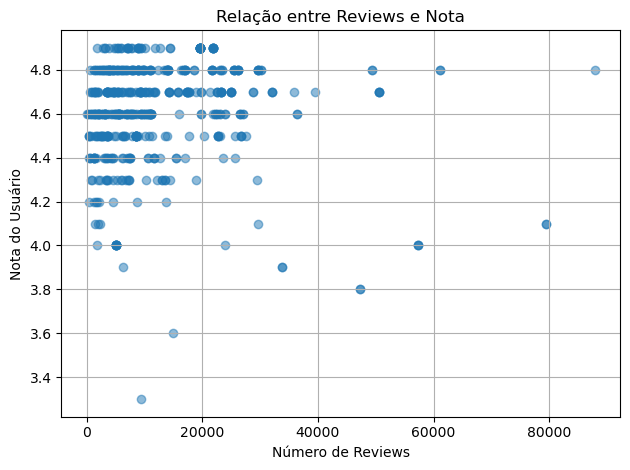

In [49]:
plt.scatter(bestsellers["Reviews"], bestsellers["User Rating"], alpha=0.5)
plt.xlabel("Número de Reviews")
plt.ylabel("Nota do Usuário")
plt.title("Relação entre Reviews e Nota")
plt.grid()
plt.tight_layout()

plt.savefig("../images/02-corr-reviews-rating.png")
plt.show()

#### Resultado:
- A maioria dos livros possui notas entre 4.6 e 4.9, independentemente da quantidade de reviews.
- A maior parte dos livros tem menos de 20.000 reviews, e poucos ultrapassam esse valor.
- A linha de regressão é praticamente horizontal, o que sugere baixa correlação entre o número de reviews e a nota.

# Pergunta #3: Quais anos tiveram livros com maiores médias de avaliação por gênero?

#### A. Agrupando as Avaliações por Ano e Gênero.

In [50]:
anoMediaAvaliacao = bestsellers.groupby(["Year", "Genre"])["User Rating"].mean().reset_index().sort_values(by="User Rating", ascending=False)
print(anoMediaAvaliacao.head())

    Year        Genre  User Rating
20  2019      Fiction     4.820000
18  2018      Fiction     4.738095
16  2017      Fiction     4.737500
14  2016      Fiction     4.715789
21  2019  Non Fiction     4.686667


#### B. Planejando Anos com Maiores Médias de Avaliação por Gênero

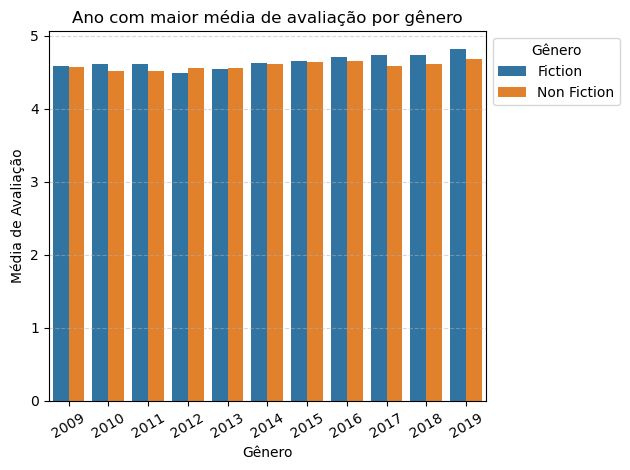

In [51]:
sns.barplot(data=anoMediaAvaliacao, x="Year", y="User Rating", hue="Genre")
plt.legend(title='Gênero', bbox_to_anchor=(1, 1))
plt.title("Ano com maior média de avaliação por gênero")
plt.ylabel("Média de Avaliação")
plt.xlabel("Gênero")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("../images/03-ano-rating-genre.png")
plt.show()

#### Resultado:
- Ambos os gêneros mantêm médias de avaliação bastante altas, todas entre 4.4 e 4.9.
- Em 2019, o gênero Fiction atingiu a maior média de avaliação, quase chegando ao 4.9.
- A partir de 2014 em diante, Fiction geralmente supera ou se iguala ao Non Fiction em média de avaliações.

# Pergunta #4: Existe uma faixa de preço mais comum entre os livros mais vendidos?

#### A. Analisando qual valor de livro é mais recorrente.

In [52]:
valorComum = bestsellers["Price"].value_counts()
print(valorComum.head())

Price
8     52
6     38
9     38
5     36
11    35
Name: count, dtype: int64


B. Analisando valor dos livros por Gênero.

In [58]:
valorComumGenre = bestsellers.groupby("Price")["Genre"].value_counts().unstack()
print(valorComumGenre)

Genre  Fiction  Non Fiction
Price                      
0         11.0          1.0
1          NaN          1.0
2          3.0          2.0
3          NaN          1.0
4         14.0         18.0
5         27.0          9.0
6         10.0         28.0
7         18.0          5.0
8         30.0         22.0
9         16.0         22.0
10        15.0         13.0
11        13.0         22.0
12        14.0         13.0
13        13.0         16.0
14        14.0         16.0
15         7.0         14.0
16         2.0         18.0
17         NaN         19.0
18         7.0          7.0
19         2.0          2.0
20         6.0         11.0
21         1.0          8.0
22         3.0          3.0
23         NaN          5.0
24         NaN          5.0
25         1.0          1.0
27         3.0          1.0
28         NaN          6.0
30         5.0          NaN
32         1.0          1.0
36         NaN          1.0
39         1.0          NaN
40         NaN          5.0
42         1.0      

#### C. Observando qual gênero tem a média de valor mais caro

Genre
Fiction        10.85
Non Fiction    14.84
Name: Price, dtype: float64


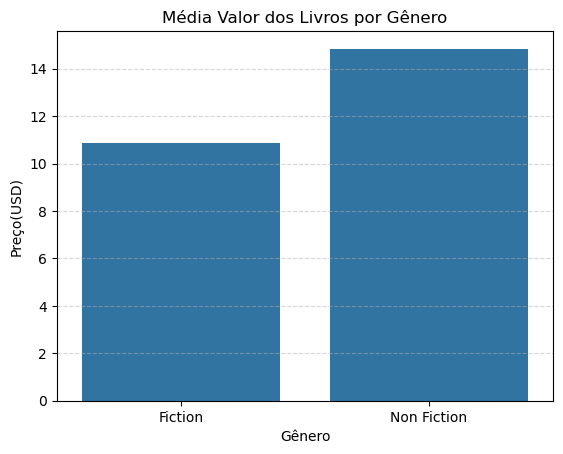

In [103]:
valorMedioPorGenre = bestsellers.groupby("Genre")["Price"].mean().round(2)
print(valorMedioPorGenre)

sns.barplot(valorMedioPorGenre)
plt.title("Média Valor dos Livros por Gênero")
plt.ylabel("Preço(USD)")
plt.xlabel("Gênero")
plt.grid(axis="y", linestyle="--", alpha=0.5)

#### D. Planejando faixa de preço dos livros por gênero.

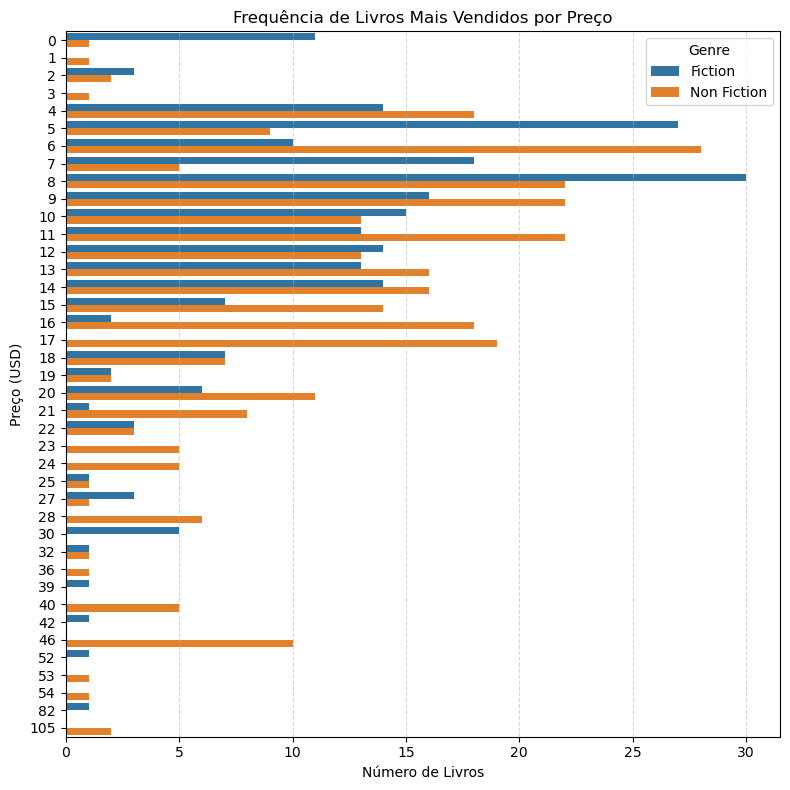

In [119]:
plt.figure(figsize=(8, 8))
sns.countplot(bestsellers, y="Price", hue="Genre")
plt.title("Frequência de Livros Mais Vendidos por Preço")
plt.xlabel("Número de Livros")
plt.ylabel("Preço (USD)")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.savefig("../images/04-value-books-genre.png")
plt.show()

#### Resultado:
- Faixa de preço mais comum: `$8 a $15`.
- O Preço mais Comum é `$8`.
- Fiction: concentra-se em preços mais baixos, como `$8`.
- Non Fiction: aparece mais entre `$13 a $18`.

# Pergunta #5: os livros estão ficando mais caros?

#### A. Organizando valores por Ano

In [106]:
precoAno = bestsellers.groupby("Year")["Price"].mean().reset_index()
print(precoAno)

    Year  Price
0   2009  15.40
1   2010  13.48
2   2011  15.10
3   2012  15.30
4   2013  14.60
5   2014  14.64
6   2015  10.42
7   2016  13.18
8   2017  11.38
9   2018  10.52
10  2019  10.08


#### B. Planejando análise de valor dos livros por ano

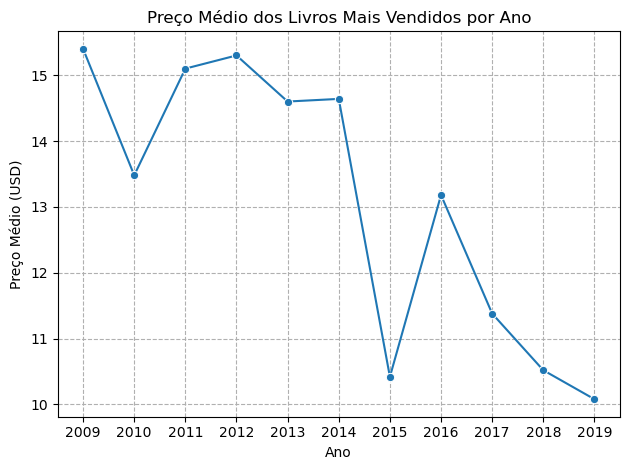

In [118]:
sns.lineplot(precoAno, x="Year", y="Price", marker="o")
plt.title("Preço Médio dos Livros Mais Vendidos por Ano")
plt.xlabel("Ano")
plt.xticks(precoAno["Year"])
plt.ylabel("Preço Médio (USD)")
plt.grid(linestyle="--")
plt.tight_layout()

plt.savefig("../images/05-value-books-year.png")
plt.show()

#### Resultado:
- 2009–2014: preços médios mais altos.
- 2015–2019: queda no preço médio.
- Os livros não estão ficando mais caros — tendência de queda.